In [1]:
#First import all basic libraries
import pandas as PD
import numpy as NP
import matplotlib.pyplot as MPL
import seaborn as SB
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset 'bank.csv'
AP_DF = PD.read_csv('Admission_Predict.csv')
AP_DF.head(9)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50


In [3]:
AP_DF.shape

(400, 9)

In [4]:
#To check null values
AP_DF.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
#To check datatypes.
AP_DF.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
AP_DF.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

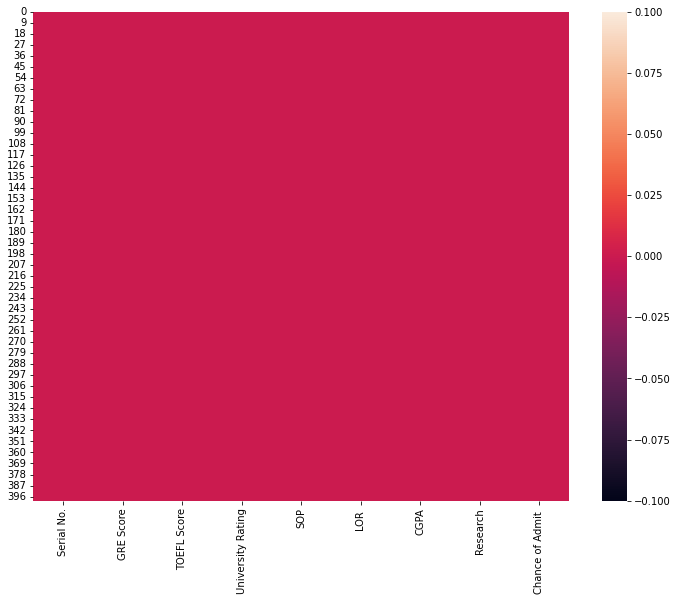

In [7]:
MPL.figure(figsize=(12,9))
SB.heatmap(AP_DF.isnull())
MPL.show()

In [8]:
AP_DF['Chance of Admit '].value_counts()

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit , dtype: int64

***************************************************************************************************

# Working on First Assumption : Remove Multicoliniearity

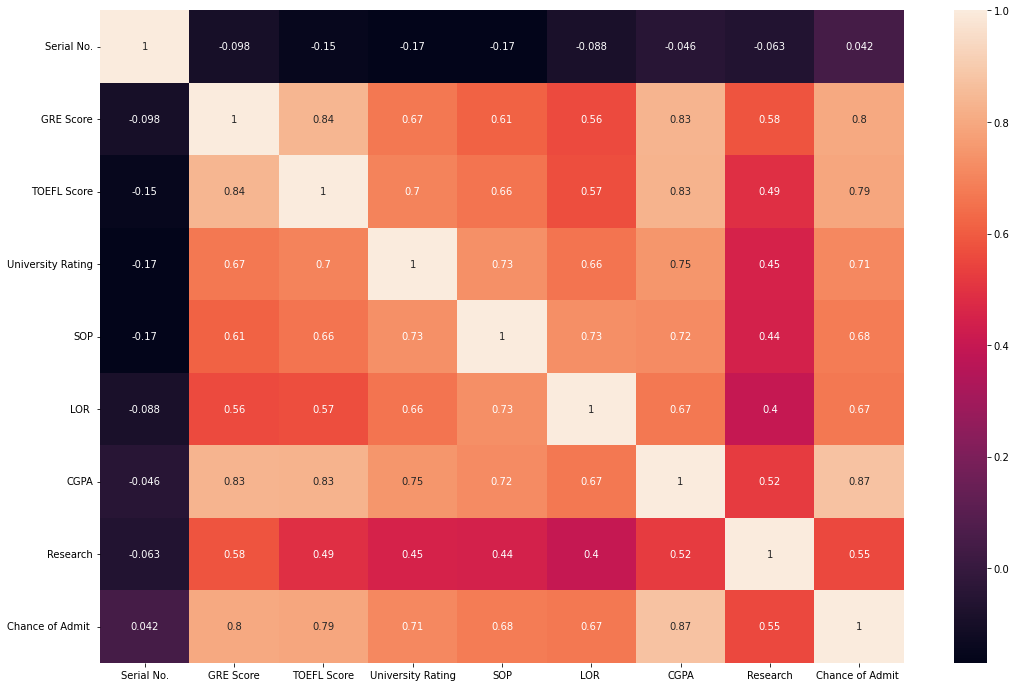

In [9]:
MPL.figure(figsize=(18,12))
SB.heatmap(AP_DF.corr(),annot=True)
MPL.show()

In [10]:
#Select Input and Output from dataset
IP = AP_DF.drop(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit '],axis=1) #INPUT
OP = AP_DF['Chance of Admit '] #OUTPUT

In [11]:
IP

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
395,9.04
396,9.11
397,9.45
398,8.78


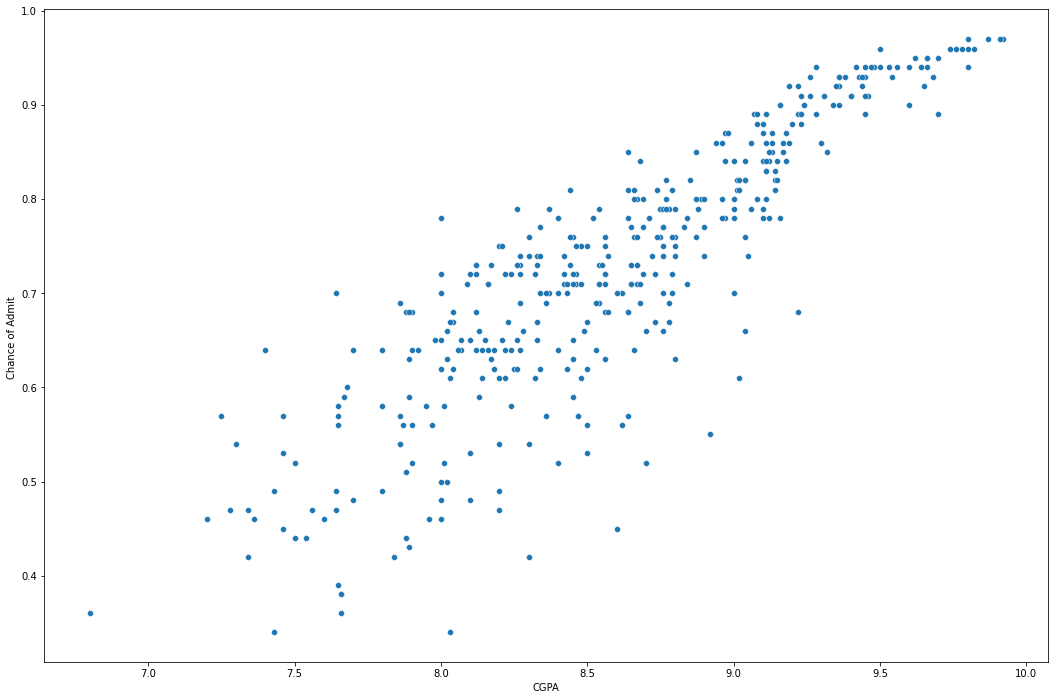

In [12]:
MPL.figure(figsize=(18,12))
SB.scatterplot(data=AP_DF,x='CGPA',y='Chance of Admit ')
MPL.show()

In [13]:
IP.columns

Index(['CGPA'], dtype='object')

In [14]:
#Import train test split
from sklearn.model_selection import train_test_split
I_P_train,I_P_test,O_P_train,O_P_test=train_test_split(IP,OP,test_size=0.3,random_state=1)

In [15]:
#Apply scaling
from sklearn.preprocessing import StandardScaler
S_S = StandardScaler()
I_P_train = S_S.fit_transform(I_P_train)
I_P_test = S_S.transform(I_P_test)

In [16]:
#LinearRegression inbuilt class
#We will give dataset in LinearRegression class because we predict continuous numeric value
from sklearn.linear_model import LinearRegression
L_R = LinearRegression()

In [17]:
#Train the model with 70% data
L_R.fit(I_P_train,O_P_train)

LinearRegression()

In [18]:
#Check SLOPE.
M=L_R.coef_
print("Slope:",M)

Slope: [0.11984692]


In [19]:
A_P_dict = {'Columns input':IP.columns,'Slope':M}
A_P_dict = PD.DataFrame(A_P_dict)
A_P_dict

,Columns input,Slope
0,CGPA,0.119847


In [20]:
#Check INTERCEPT.
C=L_R.intercept_
print("Intercept:",C)

Intercept: 0.7275357142857145


In [21]:
#Check training score.(70% trained course)
#Score is an inbuilt method of LinearRegression class
Train_Score=L_R.score(I_P_train,O_P_train)
print('Train_Score : ',Train_Score)

Train_Score :  0.7493981351140423


In [22]:
#Test the model with 30% data.
O_P_pred = L_R.predict(I_P_test)

In [23]:
#Testing score
from sklearn.metrics import r2_score
Test_Score=r2_score(O_P_test,O_P_pred) #for lr.score(I_P_test,O_P_test)
print('Test_Score : ',Test_Score)

Test_Score :  0.7850979166652725


In [24]:
print('Train_Score : ',Train_Score)
print('Test_Score : ',Test_Score)
if Train_Score > Test_Score:
    print("Train_Score > Test_Score,overfitting present,requires regularization")
else :
    print("Train_Score < Test_Score")

Train_Score :  0.7493981351140423
Test_Score :  0.7850979166652725
Train_Score < Test_Score


# Training score < Testing score,Hence model is not overfit.
# Also only one input is selected hence multicoliniearity removed.
# First Assumption Fulfilled.

***************************************************************************************************

# Work on Second Assumption : Homoskedastic vs Heterskedastic 

In [25]:
#Trick - How to check linear relation between multiple inputs and output.
#Find the residual for each input.
Residual=O_P_test - O_P_pred
print(Residual)

398   -0.092465
125   -0.098207
328    0.039556
339    0.071793
172    0.026780
         ...   
91    -0.156050
322    0.060634
248    0.019340
186    0.097750
395    0.004974
Name: Chance of Admit , Length: 120, dtype: float64


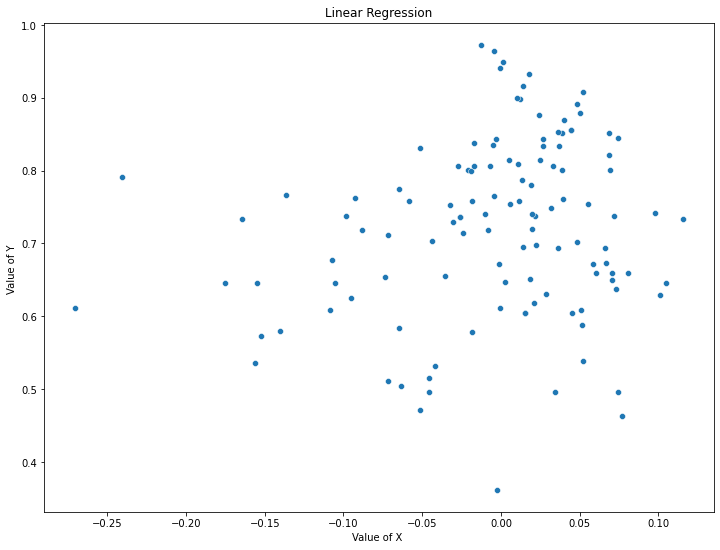

In [26]:
#Visualise
MPL.figure(figsize=(12,9))
#SB.scatterplot(AP_DF['CGPA'],AP_DF['Chance of Admit '])
SB.scatterplot(Residual,O_P_pred)
MPL.xlabel("Value of X ")
MPL.ylabel("Value of Y ")
MPL.title("Linear Regression")
MPL.show()

# Plotting of Residual v/s Predicted output is heteroskedastic.
# Second Assumption not fulfilled.

***************************************************************************************************

# Work on Third Assumption : Normal Distribution Curve.

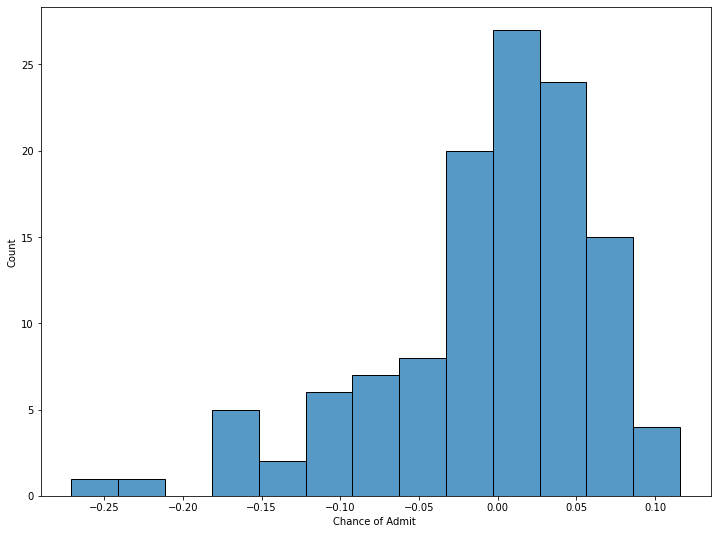

In [27]:
MPL.figure(figsize=(12,9))
SB.histplot(Residual)
MPL.show()

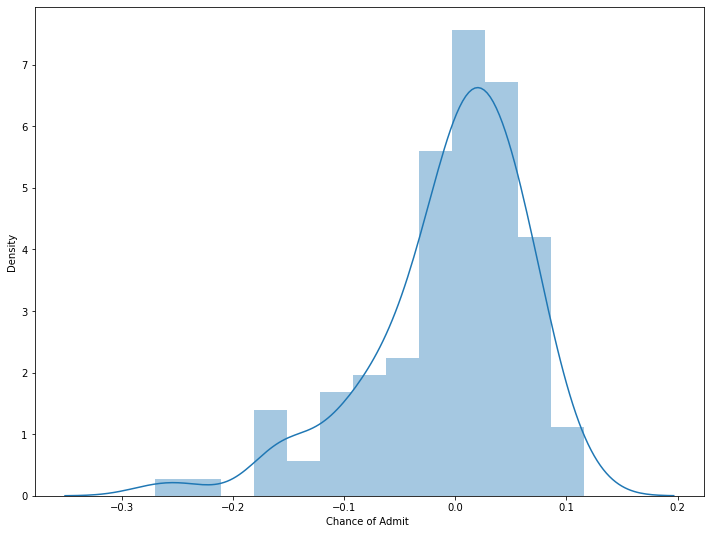

In [28]:
MPL.figure(figsize=(12,9))
SB.distplot(Residual)
MPL.show()

# Normal Distribution curve is asymmetric.Third Asumption failed.


***************************************************************************************************

# Working on fourth assumption : Skewness. 

In [29]:
Residual.skew()

-1.217668474090369

# Skewness is negative and not close to zero.
# Out of 4, Assumptions fulfilled should be 3,Here it's only 1.

***************************************************************************************************

# Let's move to Polynomial regression(Change the degree of Input)

In [30]:
#Polynomial Linear Regression
#Demo of PLR
#create user defined function for different power of independent variable
#Linear means degree/power=1 of input variable means independent variable

In [31]:
from sklearn.preprocessing import PolynomialFeatures
P_F=PolynomialFeatures(2)
I_P_Poly=P_F.fit_transform(IP)

In [32]:
#Import train test split
from sklearn.model_selection import train_test_split
I_P_train,I_P_test,O_P_train,O_P_test=train_test_split(I_P_Poly,OP,test_size=0.3,random_state=1)

In [33]:
#Apply scaling
from sklearn.preprocessing import StandardScaler
S_S = StandardScaler()
I_P_train = S_S.fit_transform(I_P_train)
I_P_test = S_S.transform(I_P_test)

In [34]:
#LinearRegression inbuilt class
#We will give dataset in LinearRegression class because we predict continuous numeric value
from sklearn.linear_model import LinearRegression
L_R = LinearRegression()

In [35]:
#Train the model with 70% data
L_R.fit(I_P_train,O_P_train)

LinearRegression()

In [36]:
#Check SLOPE.
M=L_R.coef_
print("Slope:",M)

Slope: [0.         0.01612644 0.10380761]


In [37]:
#Check INTERCEPT.
C=L_R.intercept_
print("Intercept:",C)

Intercept: 0.7275357142857151


In [38]:
#Check training score.(70% trained course)
#Score is an inbuilt method of LinearRegression class
Train_Score=L_R.score(I_P_train,O_P_train)
print('Train_Score : ',Train_Score)

Train_Score :  0.7503415344872955


In [39]:
#Test the model with 30% data.
O_P_pred = L_R.predict(I_P_test)

In [40]:
#Testing score
from sklearn.metrics import r2_score
Test_Score=r2_score(O_P_test,O_P_pred) #for lr.score(I_P_test,O_P_test)
print('Test_Score :',Test_Score)

Test_Score : 0.783916556809418


In [41]:
print('Train_Score : ',Train_Score)
print('Test_Score : ',Test_Score)
if Train_Score > Test_Score:
    print("Train_Score > Test_Score,overfitting present,requires regularization")
elif Train_Score == Test_Score:
    print("Train_Score = Test_Score")
else: print("Train_Score < Test_Score")

Train_Score :  0.7503415344872955
Test_Score :  0.783916556809418
Train_Score < Test_Score


# Since r2_score = 0.78,Here we got 78% accuracy.